# Assignment 1


## Important notes

**Submission deadline:**
* **Problems 1-4: last lab session before or on Friday, 19.10.18**
* **Problems 5-6: last lab session before or on Friday, 26.10.18**

**Points: 10 + 4 bonus points**

Please note: some of the assignments are tedious or boring if you are already a NumPy ninja. The bonus problems were designed to give you a more satisfying alternative.

The assignment is in the form of a Jupyter notebook. We will be using [Google Colab](https://colab.research.google.com) to solve it. Below you will find a "Setup" section. Follow instructions from this paragraph to download the notebook and open it using [Google Colab](https://colab.research.google.com). 

Your goal is to solve problems posted below. Whenever possible, add your solutions to the notebook.

Please email us about any problems with it - we will try to correct them quickly. Also, please do not hesitate to use GitHub’s pull requests to send us corrections!

## Setup

### 1. Open the notebook using Google Colab

1. From Github: Click on "View in Colaboratory", then save to your Google Drive.
2. Alternatively upload manually to Drive:
  1. Download the notebook or clone https://github.com/janchorowski/nn_assignments.
  2. Go to  [Google Colab](https://colab.research.google.com).
  3. Go to "UPLOAD" tab and select a local copy of the notebook that you downloaded in point 1.
  
Colab Tips:
1. Set tab width to 4 spaces under `Tools -> Prferences`.
  
### 2. Open th enotebook offline using Jupyter/IPython

This notebook can be opened using Jupyter notebook. Simply install a scientific Python distribution on your computer (e.g. [Anaconda](https://www.anaconda.com/) or [WinPython](http://winpython.github.io/)), clone the repository https://github.com/janchorowski/nn_assignments and run `jupyter notebook`.

###   3. Install required dependencies, download data and import packages

Run cells below. To run a cell either click it and click a run button or press "shift + enter"


In [14]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.
!pip install -q gdown httpimport
![ -e cifar.npz ] || gdown 'https://drive.google.com/uc?id=1oBzZdtg2zNTPGhbRy6DQ_wrf5L5OAhNR' -O cifar.npz
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/usr/lib/python2.7/site-packages/tqdm-4.27.0.dist-info'
Consider using the `--user` option or check the permissions.



In [1]:
# Standard IPython notebook imports
%matplotlib inline

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os

import httpimport
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from sklearn import datasets

# In this way we can import functions straight from github
with httpimport.github_repo('janchorowski', 'nn_assignments', 
                            module='common', branch='nn18'):
     from common.plotting import plot_mat

sns.set_style('whitegrid')

### 4. Follow the notebook and solve problems posted below

## Problems

### Problem 0 [0p]

 
1. To learn more about Jupyter,  read [Jupyter tutorial from Data Analysis in Biological Sciences course at Caltech](http://bebi103.caltech.edu/2015/tutorials/t0b_intro_to_jupyter_notebooks.html) (which itself can be downloaded as a Jupyter notebook). Feel free to skip the tutorial if you have some prior experience with Jupyter notebook.
2. To learn more about basic Google Colab features, go to [Google Colab](https://colab.research.google.com) and select "Overview of Colaboratory Features" in "EXAMPLES" tab. To learn more about / set up useful keyboard shortcuts (e.g. to add a new cell without clicking ""+ code"), go to "Tools --> Keyboard shortcuts"

### Problem 1 [2p]

First, get familiar with Python at https://docs.python.org/2/tutorial/. Then, get
to know the capabilities of NumPy, the prime numerical library of Python http://www.numpy.org/, for instance with the tutorial at http://wiki.scipy.org/Tentative_NumPy_Tutorial.

You might also need:
  1. another intro to NumPy,
http://people.duke.edu/~ccc14/pcfb/numerics.html
  2. a better interactive shell for Python,
http://ipython.org/
  3. access to IPython through an ordinary web browser,
http://ipython.org/notebook.html
  4. a plotting library for Python.
http://matplotlib.org/

**a) Declare variables:**
1. $a=10$,
2. $b=2.5\times 10^{23}$,
3. $c=2+3i$, where $i$ is an imaginary unit,
4. $d=e^{i2\pi/3}$, where $i$ is an imaginary unit, $e$ is the Euler's number (use `exp`, `pi`).

In [7]:
# TODO: Complete the declarations
a = 10
b = 2.5e23
c = 2 + 3j
d = np.exp((2j*np.pi) / 3)

**b) Declare vectors:**
1. $aVec=\begin{bmatrix} 3.14 & 15 & 9 & 26 \end{bmatrix}$,
2. $bVec=\begin{bmatrix} 2.71 & 8 & 28 & 182 \end{bmatrix}^\intercal$ (column vector),
3. $cVec=\begin{bmatrix} 5 & 4.8 & \cdots & -4.8 & -5 \end{bmatrix}$ (vector of numbers from $5$ to $-5$ decreasing by $0.2$),
4. $dVec=\begin{bmatrix} 10^0 & 10^{0.01} & \cdots & 10^{0.99} & 10^1 \end{bmatrix}$ (logarithmically spaced numbers from 1 to 10, use `logspace` and make sure, that the result has correct length!),
5. $eVec=Hello$ ($eVec$ is a string of characters, thus a vector).

In [16]:
aVec = np.array([3.14, 15,19, 26]).reshape(1,4)
bVec = np.array([2.71, 8, 28, 182]).reshape(4,1)
cVec = np.arange(5.0,-5.2,-0.2)
dVec = np.logspace(0.0, 1.0, num=101)
eVec = np.array(list('Hello'))


**c) Declare matrices:**
1. $aMat=\begin{bmatrix}
                    2      & \cdots & 2 \\
                    \vdots & \ddots & \vdots \\
                    2      & \cdots & 2
                \end{bmatrix}$,
<br/>
matrix $9\times 9$ filled with 2s (use `ones` or `zeros`),
2. $bMat=\begin{bmatrix}
                    1      & 0      & \cdots &        & 0      \\
                    0      & \ddots & 0      &        & 0      \\
                    \vdots & 0      & 5      & 0      & \vdots \\
                           &        & 0      & \ddots & 0      \\
                    0      &        & \cdots & 0      & 1
                \end{bmatrix}$,
<br/>
matrix $9\times 9$ filled with zeros, with $\begin{bmatrix} 1 & 2 & 3 & 4 & 5 & 4 & 3 & 2 & 1 \end{bmatrix}$ on its diagonal (use `zeros`, `diag`),
3. $cMat=\begin{bmatrix}
                    1      & 11     & \cdots & 91     \\
                    2      & 12     & \ddots & 92     \\
                    \vdots & \vdots & \ddots & \vdots \\
                    10     & 20     & \cdots & 100
                \end{bmatrix}$,
<br/>
matrix $10\times 10$, columns of which form the vector $1:100$ (use `reshape`),
4. $dMat=\begin{bmatrix}
                    NaN & NaN & NaN & NaN \\
                    NaN & NaN & NaN & NaN \\
                    NaN & NaN & NaN & NaN
                \end{bmatrix}$,
<br/>
matrix $3\times 4$ filled with `NaN`s (use... `NaN`),
5. $eMat=\begin{bmatrix}
                    13  & -1  & 5  \\
                    -22 & 10  & -87
                \end{bmatrix}$,
<br/>
6. $fMat$ filled with random natural numbers from $[-3,3]$ (use `rand` and `floor` or `ceil`).

In [23]:
aMat = 2*np.ones([9,9])
bMat = np.diag([1,2,3,4,5,4,3,2,1])
cMat = np.arange(1,101).reshape(10,10).T
dMat = np.full([3,4], np.NaN)
eMat = np.array([[13, -1, 5], [-22, 10, -87]])
fMat = np.floor(np.random.rand(9,9)*10 * 2/3) - 3
fMat

array([[ 2., -1.,  0.,  0.,  3., -3., -2.,  1., -1.],
       [-2., -3., -3.,  1., -2., -3.,  0.,  1.,  2.],
       [-3., -2.,  3.,  2.,  3., -1., -2., -2.,  2.],
       [ 0., -3., -1.,  1.,  1.,  1., -3., -2., -1.],
       [-2., -1., -2., -1.,  2., -1.,  0., -3., -3.],
       [-3.,  2.,  0.,  1.,  2., -3., -1., -1.,  2.],
       [ 1.,  0.,  0., -2., -2., -3., -2.,  2.,  2.],
       [ 2.,  0.,  3.,  2.,  2.,  0.,  2., -2., -2.],
       [ 0., -1.,  2., -3.,  0.,  2., -1., -1., -1.]])

** d) Declare a multiplication table ** as a $10\times 10$ matrix `mulMat`. Use matrix/vector multiplication.

In [85]:
mulMat = np.dot(np.arange(1,11).reshape(10,1), np.arange(1,11).reshape(1,10))
mulMat

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

** e) Compute elemwise using values from b).**
For instance, the first element of $xVec[0]$ should be equal to

\begin{equation}
1/(\sqrt{2\pi2.5^2}) e^{-cVec[0]^2 / (2\cdot\pi 2.5^2)}.
\end{equation}

1. $xVec=1/(\sqrt{2\pi2.5^2}) e^{-cVec^2 / (2\cdot\pi 2.5^2)}$
2. $yVec=\sqrt{(aVec^\intercal)^2 + bVec^2}$
3. $zVec=\log_{10}(1/dVec)$, using `log10`

In [17]:
xVec = 1/np.square(2*np.pi*np.power(2.5,2))*(np.exp(-1*cVec**2/(2*np.pi*np.power(2.5,2))))
yVec = np.square(aVec.T**2 + bVec**2)
zVec = np.log10(1/dVec)


** f) Compute with matrix/vector operations using values from c).**

**NOTE:** Every multiplication (and power) in this subtask is a [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication).
1. $xMat=(aVec\cdot bVec)aMat^2$,
2. $yMat=bVec\cdot aVec$
<br/>
(remember, that matrix multiplication is not commutative),
4. $zMat=\lvert cMat\rvert (aMat\cdot bMat)^\intercal$, where $\lvert A\rvert$ denotes determinant of $A$ (use `det`).

In [20]:
xMat = np.multiply(np.dot(aVec, bVec), np.dot(aMat,aMat))
yMat = np.dot(bVec,aVec)
zMat = np.linalg.det(cMat) * np.dot(aMat,bMat).T

0.0

** g) Declare `ismagic(A)` function ** which checks if matrix $A$ is a [magic square](https://en.wikipedia.org/wiki/Magic_square) and returns a boolean.

In [9]:
def ismagic(A):
    #check if its square
    if A.shape[0] != A.shape[1]:
        return False
    #sum by X and Y axis
    hor = np.unique(A.sum(axis=0))
    ver = np.unique(A.sum(axis=1))
    #check if there is only one uniqe element
    if hor.size == 1:
        hor = hor[0]
    else: return False
    if ver.size == 1:
        ver = ver[0]
    else: return False
    #get sum of both diagonals
    diag1 = np.diag(A).sum()
    diag2 = np.diag(A[:,::-1]).sum()
    #check if every sum is the same
    if hor == ver and ver == diag1 and diag1 == diag2:
        return True
    else: return false
ismagic(np.array([[2,7,6],[9,5,1],[4,3,8]]))

True

### k-Nearest Neighbors

The following excerpt of code loads the data describing iris flowers
and shows relations between their length and petal width for three
species (namely: setosa, versicolor, virginica).

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:  ['setosa' 'versicolor' 'virginica']


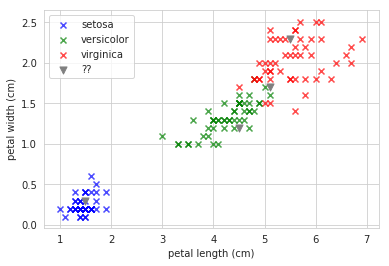

In [9]:
# sklearn is a large collection of machine learning algorithms
# here we’ll use it only for the built-in iris dataset
from sklearn import datasets

iris = datasets.load_iris()

print('Features: ', iris.feature_names)
print('Targets: ', iris.target_names)

petal_length = iris.data[:, iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]

for target in set(iris.target):
    example_ids = target == iris.target
    plt.scatter(petal_length[example_ids], petal_width[example_ids],
                label=iris.target_names[target], color='bgr'[target],
                marker='x', alpha=0.7)
unknown = np.array([
    [1.5, 0.3],
    [4.5, 1.2],
    [5.5, 2.3],
    [5.1, 1.7]
])
plt.scatter(unknown[:, 0], unknown[:, 1], marker='v',
            color='gray', s=50, label='??')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.grid(True)
plt.legend(loc='upper left');

Based on these two features, it is easy to distinguish iris setosa from the two remaining species. Yet iris versicolor and virginica remain mixed together. 

Looking closely at the plot, we might estimate the species of the selected unknown irises (gray triangles). For three of them the answer seems obvious – they belong in uniformly-colored areas covered by one species only. Yet unknown iris flower in (5.1, 1.7) is troublesome – it lays on the boundary of versicolor and virginica clusters. We can assume, that its species is the one of the closest one to it, coming from the training set (and so having a label). 

K-Nearest Neighbors method (http://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) solves the classification problem, i.e. sets class labels (species in case of irises) of a previously unseen sample by choosing the most common class among the top k neighbors of the sample in question (for instance according to the Euclidean distance). Thus, the k-Nearest Neighbors algorithm works as follows. For each unlabeled sample x:
1. Find k nearest neighbors among the labeled samples.
2. Set the most common label among them as label of x.

#### Problem 2 [2p]

1.  **[1p]** Load the iris data (in Python it’s built-in into machine learning libraries, use sklearn.datasets.load_iris), the data is also available on-line at https://archive.ics.uci.edu/ml/datasets/Iris

2.  **[1p]** Irises are described with 4 attributes: petal and sepal widths and lengths. We often plot such data as matrices depicting relationships between pairs of attributes (the diagonal of which holds an ordinary histogram). Write code making a plot like the one below. Please pay attention to the details: make a proper legend and correctly label the axes.

<img src="https://github.com/janchorowski/nn_assignments/blob/nn18/assignment1/iris4x4.png?raw=1"/>

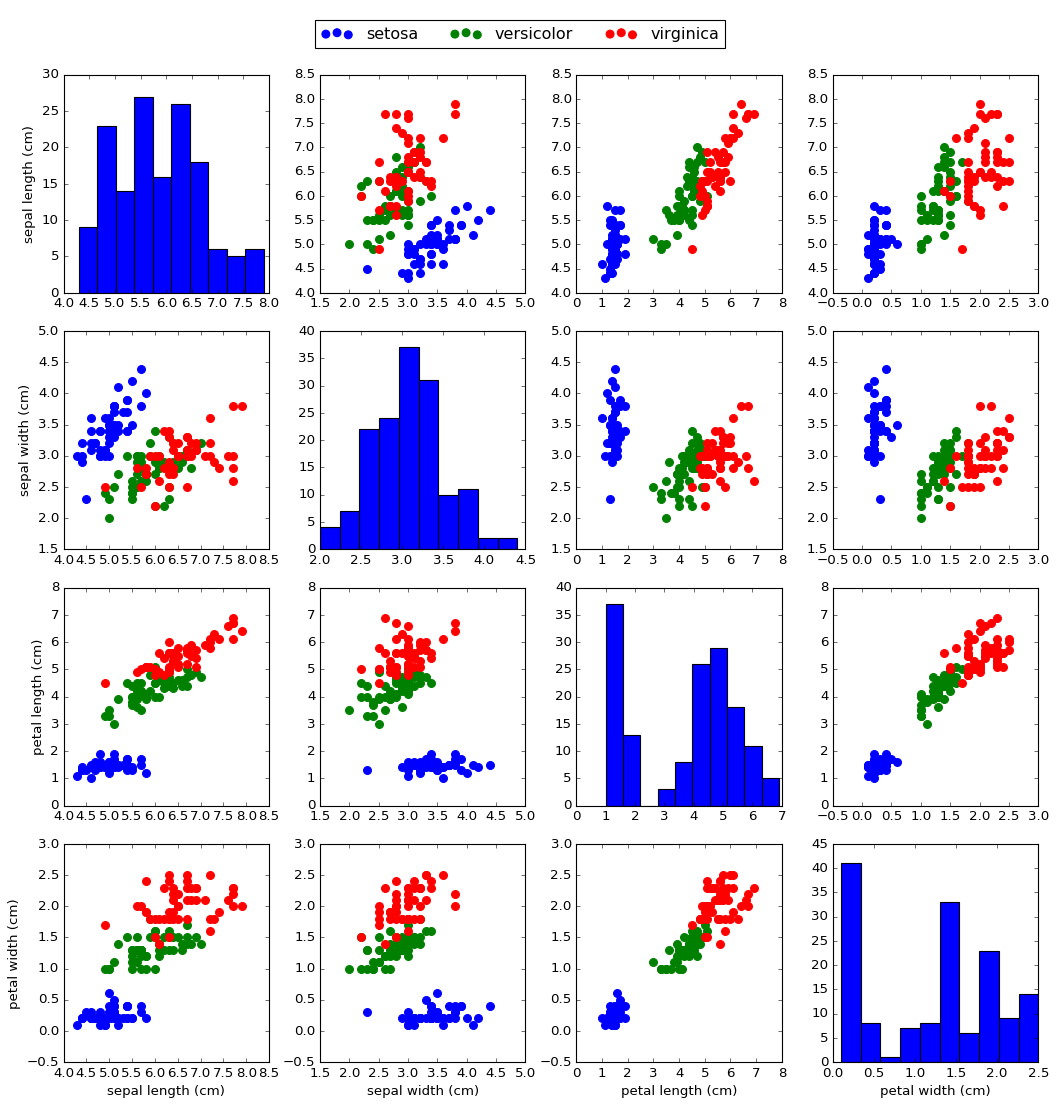

In [10]:
# Problem 2

import matplotlib as mpl
mpl.style.use('classic')


from sklearn import datasets

from matplotlib.legend_handler import HandlerLine2D

#load data
iris = datasets.load_iris()
#sep data
sepal_length = iris.data[:, iris.feature_names.index('sepal length (cm)')]
sepal_width = iris.data[:, iris.feature_names.index('sepal width (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]
petal_length = iris.data[:, iris.feature_names.index('petal length (cm)')]


f, arrplt = plt.subplots(4,4,figsize=(13,13))
f.patch.set_facecolor('white')
for ax in arrplt.flat:
    ax.grid(False)
plt.tight_layout()
#set labels
arrplt[0][0].set(ylabel='sepal length (cm)')
arrplt[1][0].set(ylabel='sepal width (cm)')
arrplt[2][0].set(ylabel='petal length (cm)')
arrplt[3][0].set(ylabel='petal width (cm)')
arrplt[3][0].set(xlabel='sepal length (cm)')
arrplt[3][1].set(xlabel='sepal width (cm)')
arrplt[3][2].set(xlabel='petal length (cm)')
arrplt[3][3].set(xlabel='petal width (cm)')
# make diagonal histograms
arrplt[0][0].hist(sepal_length, facecolor='b')
arrplt[1][1].hist(sepal_width, facecolor='b')
arrplt[2][2].hist(petal_length, facecolor='b')
arrplt[2][2].set_xlim(0)
arrplt[3][3].hist(petal_width, facecolor='b')
#make plots
for target in set(iris.target):
    example_ids = target == iris.target
    arrplt[0][1].scatter(sepal_width[example_ids], sepal_length[example_ids],
                label=iris.target_names[target], color='bgr'[target],
                marker='o', s=50)
for target in set(iris.target):
    example_ids = target == iris.target
    arrplt[0][2].scatter(petal_length[example_ids], sepal_length[example_ids],
                color='bgr'[target],
                marker='o', s=50)
for target in set(iris.target):
    example_ids = target == iris.target
    arrplt[0][3].scatter(petal_width[example_ids], sepal_length[example_ids],
                color='bgr'[target],
                marker='o', s=50)
for target in set(iris.target):
    example_ids = target == iris.target
    arrplt[1][0].scatter(sepal_length[example_ids], sepal_width[example_ids],
                color='bgr'[target],
                marker='o', s=50)
for target in set(iris.target):
    example_ids = target == iris.target
    arrplt[1][2].scatter(petal_length[example_ids], sepal_width[example_ids],
                color='bgr'[target],
                marker='o', s=50)    
for target in set(iris.target):
    example_ids = target == iris.target
    arrplt[1][3].scatter(petal_width[example_ids], sepal_width[example_ids],
                color='bgr'[target],
                marker='o', s=50)
for target in set(iris.target):
    example_ids = target == iris.target
    arrplt[2][0].scatter(sepal_length[example_ids], petal_length[example_ids],
                color='bgr'[target],
                marker='o', s=50)
for target in set(iris.target):
    example_ids = target == iris.target
    arrplt[2][1].scatter(sepal_width[example_ids], petal_length[example_ids],
                color='bgr'[target],
                marker='o', s=50)
for target in set(iris.target):
    example_ids = target == iris.target
    arrplt[2][3].scatter(petal_width[example_ids], petal_length[example_ids],
                color='bgr'[target],
                marker='o', s=50)
for target in set(iris.target):
    example_ids = target == iris.target
    arrplt[3][0].scatter(sepal_length[example_ids], petal_width[example_ids],
                color='bgr'[target],
                marker='o', s=50)
for target in set(iris.target):
    example_ids = target == iris.target
    arrplt[3][1].scatter(sepal_width[example_ids], petal_width[example_ids],
                color='bgr'[target],
                marker='o', s=50)
for target in set(iris.target):
    example_ids = target == iris.target
    arrplt[3][2].scatter(petal_length[example_ids], petal_width[example_ids],
                color='bgr'[target],
                marker='o', s=50)
#make legend
plt.figlegend(bbox_to_anchor=(0, 0.95, 1., .102),loc = 'upper center', ncol=5, labelspacing=0. )
  

#### Problem 3 [2p]

Implement the k-Nearest Neighbors algorithm. Try to
take advantage of matrix calculus rather than using for loops.

**Tip:** What is computed by \begin{equation} \sqrt{(X - Y)^T (X - Y)} \end{equation} when both X and Y are vectors?

**Tip:** Try to use broadcasting (NumPy: http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) and built-ins sort, numpy.sort, numpy.argsort (sorting), scipy.stats.mode (choosing the most common element of the set).

In [11]:
#Problem 3
def kNearestNeib(Set, Test, Labels, k): 
    DistMatrix = ((np.sum((Set[:, None, :] - Test[:, :, None]) ** 2, axis=0)))
    merged = []
    result = []
    for i in range(0,DistMatrix[:,0].size):
        merged.append(zip(DistMatrix[i], Labels))
        merged[i].sort()
        max = ((np.unique(zip(*merged[i][:k])[1],return_counts=True)))
        result.append(max[0][np.argmax(max[1])])
    return result
kNearestNeib(np.random.rand(16).reshape(2,8), np.random.rand(6).reshape(2,3), ['b','w','b','g', 'w', 'g', 'b', 'w'], 4)




['w', 'g', 'w']

#### Problem 4 [2p]
Consider the following experiment:
1. We scramble the data and split it into two parts - training set (66.6% of all samples) and test set (33.4%).
2. Based on the training set, we use the k-NN algorithm to predict the labels on the test set.
3. We then check the number of errors and write it down.

Do this 500 times for k ∈ {1, 3, 5, ..., 19}. Plot a function of the average number of errors
as the function of k. It should be similar to the one below.

<img src="https://github.com/janchorowski/nn_assignments/blob/nn18/assignment1/knn.png?raw=1"/>

Text(0,0.5,'Average classification error[%]')

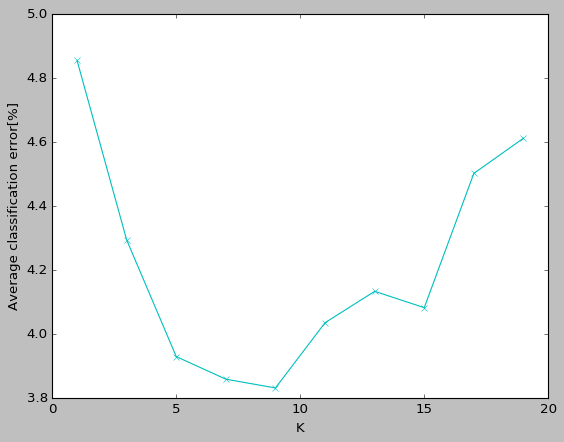

In [26]:
errors_count = []
for j in [1,3,5,7,9,11,13,15,17,19]:
    errors_c = 0
    for i in range(0, 500):
        ind = np.array(range(150))
        np.random.shuffle(ind)
        data = iris.data[ind]
        labels = iris.target[ind]
        petal_length = iris.data[ind, iris.feature_names.index('petal length (cm)')]
        petal_width = iris.data[ind, iris.feature_names.index('petal width (cm)')]
        data = np.array(zip(petal_length, petal_width)).T
        Set_Num = int(np.floor(150 * 66.6 / 100))
        Tre_Num = int(150 - Set_Num)
        res = np.array(kNearestNeib(data[:,:Set_Num], data[:,Set_Num:], labels[:Set_Num], j))
        errors = res == labels[Set_Num:]
        errors = np.count_nonzero(errors == False)
        errors_c += errors
    errors_c /= 500
    errors_count.append(errors_c * 100 / Tre_Num)
errors_count
plt.plot([1,3,5,7,9,11,13,15,17,19], errors_count, 'cx-')
plt.xlabel('K')
plt.ylabel('Average classification error[%]')

### Problem 5 [2p] 

Apply the K-Nearest Neighbors (K-NN) algorithm to the MNIST and CIFAR10 datasets. 

The MNIST (http://yann.lecun.com/exdb/mnist/) dataset consists of normalized (centered and stretched) scans of hand-written digits. Specifically, each element of the dataset is a 28 × 28 grayscale image, thus having 764 8-bit pixels. 

The CIFAR10 (http://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of small, 32 by 32 pixels, RGB images belonging to 10 categories.

1. **[1p]** Download and load the MNIST and CIFAR10 datasets. For both datasets, display a few objects from each of the classes, paying attention to aesthetics and clarity of your presentation. **Note:** You already downloaded the datasets in "Setup" section. Please use the code below to get started.

2. **[2p]** Apply a k-NN classifier to the MNIST and CIFAR10 datasets. First, divide the training set into two parts, which we will call training and validation. On MNIST use the first 50000 samples for training and the last 10000 for validation. On CIFAR10, use 40000 to train and 10000 for validation. Then find the optimal number of neighbors by assessing the accuracy on the validation set. You do not need to repeat this experiment multiple times. Finally, compute the accuracy on the test set obtained with the best previously chosen number of neighbors. On MNIST you should get about 3% errors, while on CIFAR10 you should get about 70% errors. Why CIFAR10 is harder than MNIST? Pick a few mislabeled samples from the test dataset and plot them along with the correct ones. **Note:**
  * MNIST and CIFAR10 are much larger than the Iris dataset. A good implementation may need a few minutes depending on your runtime type. Please optimize your algorithm:
  * Compute the distances only once, then test for different values of k.
  * Use vectorized expressions to compute the distance. It is possible to compute all distances between the training and testing points in one expression. Hint: think about the vectorized expression \begin{equation}(X - Y)^T (X - Y)\end{equation}.
  * You can use single precision numbers in computation.
  * If your code is taking a long time to execute, please save its results before the lab session.

**Note:** in NumPy, matrices have its own data type (dtype), which is retained during
calculations. Please pay attention to it. I particular, do not subtract values of data types not
having the sign bit, do not divide integers, etc. Results of such operations will not be
automatically casted to types having the required precision.

In [58]:
with np.load('mnist.npz') as data:
    mnist_full_train_data_uint8 = data['train_data']
    mnist_full_train_labels_int64 = data['train_labels']
    mnist_test_data_uint8 = data['test_data']
    mnist_test_labels_int64 = data['test_labels']
        
# Split train data into train and validation sets
mnist_train_data_uint8 = mnist_full_train_data_uint8[:50000]
mnist_train_labels_int64 = mnist_full_train_labels_int64[:50000]
mnist_valid_data_uint8 = mnist_full_train_data_uint8[50000:]
mnist_valid_labels_int64 = mnist_full_train_labels_int64[50000:]
mnist_valid_data_uint8[:20,None].shape

(20, 1, 28, 28)

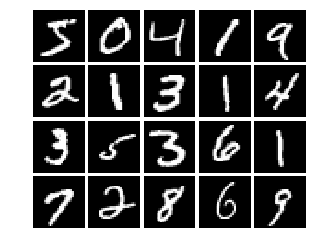

In [55]:
plot_mat(mnist_valid_data_uint8[:20, None], cmap='gray')

In [63]:
with np.load('cifar.npz') as data:
    cifar_full_train_data_uint8 = data['train_data']
    cifar_full_train_labels_int64 = data['train_labels']
    cifar_test_data_uint8 = data['test_data']
    cifar_test_labels_int64 = data['test_labels']
    
# Split train data into train and validation sets
cifar_train_data_uint8 = cifar_full_train_data_uint8[:40000]
cifar_train_labels_int64 = cifar_full_train_labels_int64[:40000]
cifar_valid_data_uint8 = cifar_full_train_data_uint8[40000:]
cifar_valid_labels_int64 = cifar_full_train_labels_int64[40000:]

(20, 1, 32, 32)

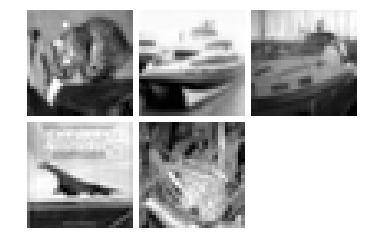

In [144]:
#
# TODO: plot an example of each class on MNIST and on CIFAR-10
#
plot_mat(cifar_test_data_uint8[:5,None,:,:,0], cmap='gray')

In [155]:
from scipy.stats import mode


def KNN(train_X, train_Y, test_X, test_Y, ks, batch_size=200):
    """
    Compute error rate for various 
    """
    errs = np.zeros((len(ks),))
    for i in xrange(0, test_Y.shape[0], batch_size):
        batch_X = test_X[i:i + batch_size]
        batch_Y = test_Y[i:i + batch_size]
        print("Examples %d:%d Computing distances... " %
              (i, i + batch_size), end='')
        
        #
        # TODO: fill in an efficient distance matrix computation
        #
        #((np.sum((Set[:, None, :] - Test[:, :, None]) ** 2, axis=0)))
        dists = (train_X[:, None, :, :] - batch_X[:, :, :, None])
        print(dists.shape)
        print("Sorting... ", end='')
        closest = np.argsort(dists, 0)

        print("Computing errors...")
        targets = train_Y[closest]

        for ki, k in enumerate(ks):
         #   predictions, unused_counts = mode(targets[:k, :], axis=0)
          #  predictions = predictions.ravel()
            #
            # TODO: fill in error count computation
            #
            errs[ki] += 0#TODO
        break
    errs /= test_Y.shape
    return np.vstack((ks, errs))

In [156]:
# Now find the best k on the validation set

mnist_validation_errs = KNN(
    mnist_train_data_uint8, mnist_train_labels_int64,
    mnist_valid_data_uint8, mnist_valid_labels_int64,
    [1, 3, 5, 7, 9])

#plt(mnist_validation_errs[0, :], mnist_validation_errs[1, :])

Examples 0:200 Computing distances... 

ValueError: operands could not be broadcast together with shapes (50000,1,28,28) (200,28,28,1) 

In [0]:
# Now use the best k to compute the test error

best_K = TODO

mnist_full_train_data_uint8 = mnist_train_dataset.train_data.numpy()
mnist_full_train_labels_int64 = mnist_train_dataset.train_labels.numpy()

mnist_test_errs = KNN(mnist_full_train_data_uint8, 
                      mnist_full_train_labels_int64,
                      mnist_test_data_uint8, 
                      mnist_test_labels_int64, [best_K])
print("When k=%d the test error rate is %.1f%%" %
      (mnist_test_errs[0, 0], mnist_test_errs[1, 0] * 100.0))

In [0]:
#
# Now repeat the k-NN training for CIFAR10
#

### Locality sensitive hashing

Problem 5 was about speeding up the inference using loops implicitly present in matrix multiplication instead of explicit loops in Python. In this problem, we will explore a strategy to truly reduce the total number of computations required to find nearest neighbors without sacrificing too much accuracy.

To speed up nearest neighbor search we will employ *Locality Sensitive Hashing (LSH)* functions. For a given distance metric, the locality sensitive hash should put items that are similar into the same bucket. Notice that this is essentially a design choice opposite to traditional cryptographic hash functions that should amplify the difference of similar inputs (typically we want that small perturbations of data result in large changes to the hash value).

One of the simplest implementations of LSH approximates the cosine distance. Let $x\in \mathbb{R}^N$ and $y\in \mathbb{R}^N$ be two vectors. Their cosine distance is defined as:

\begin{equation}
    d_\text{cos}(x,y) = \frac{x \cdot y}{\|x\| \|y\|} = \cos\left(\theta(x,y)\right),
\end{equation}
where $\theta(x,y)$ is the unsigned angle between $x$ and $y$.

We will construct a family $H$ of hash functions that are an LSH for angle distances (an approximation to cosine distance). Assume $p\in \mathbb{R}^N$ is a random vector (components are sampled from the normal distribution) of length 1. Then define the hash function $h(x) = \text{sgn}(x\cdot p)$, where $\text{sgn()}$ is the sign function. It can be proven that:

\begin{equation}
    p_{h\in H}[h(x)=h(y)] = 1 - \frac{\theta(x,y)}{\pi}.
\end{equation}

The equation means that the probability of a hash collision grows as the the angle between two vectors gets smaller. Therefore, vectors that are close according to the cosine distance will be put with high probability into the same bin (we use the fact that for small $\theta$ we can approximate $\cos(\theta) = 1 - \theta/\pi$.

We will say that a family of randomly chosen hash functions $H$ is $(d_1, d_2, p_1, p_2)$-sensitive with respect to a distance metric $d$ if for any $x$ and $y$:
1. If $d(x,y) \leq d_1$ then $p_{h\in H}[h(x)=h(y)] \geq p_1$.
2. If $d(x,y) \geq d_2$ then $p_{h\in H}[h(x)=h(y)] \leq p_2$.

For example, our family of randomly chosen hyperplanes is $(d_1, d_2, (1-d_1)/\pi, (1-d_2)/\pi)$-sensitive.

Ideally, vectors should be placed into the same bin with a high probability if their distance is smaller than a threshold, and with a low probability if their distance is larger that the threshold. By combining hashing functions we can get closer to this ideal sensitivity.

Given a family of hash functions $H$ with sensitivity $(d_1, d_3, p_1, p_2)$ we can construct a new family $H'$ by combining $r$ functions from $H$:
1. AND: let $h=[h_1, h_2, \ldots, h_r] \in H'$ and $h(x)=h(y)$ if and only if $\forall_i h_i(x)=h_i(y)$. Then $H'$ is $(d_1, d_2, (p_1)^r, (p_2)^r)$-sensitive.
2. OR: let $h=[h_1, h_2, \ldots, h_r] \in H'$ and $h(x)=h(y)$ if and only if $\exists_i h_i(x)=h_i(y)$. Then $H'$ is $(d_1, d_2, 1-(1-p_1)^r, 1-(1-p_2)^r)$-sensitive.

AND makes all probabilities shrink, but properly choosing $r$ we can make the lower probability approach 0 while the higher does not. Conversely, OR makes all probabilities grow, we can make the upper probability approach 1 while the lower does not.

#### Problem 6 [2-4p bonus] 

1. **[1bp]** **Note:** you can show sketches of proofs for this assignment.
    1. Show that angle between vectors is a metric (https://en.wikipedia.org/wiki/Metric_(mathematics)).
    
    2. Show that $p_{h\in H}[h(x)=h(y)] = 1 - \frac{\theta(x,y)}{\pi}$ for $h$ computed using a randomly chosen hyperplane.

    3. Show the properties of either AND or OR boosting of LSH.

3. **[1-3bp]** Reimplement k-Nearest Neighbors for MNIST classification using the cosine distance instead of the Euclidean distance. Choose a sensible value of $k$. Use Locality Sensitive Hashing to achieve an error rate no greater than $150\%$ of the original error rate with at least a $90\%$ speedup (i.e., by considering on average at most 5000 training samples per query image). For a few settings plot the speedup-vs-accuracy relation.

  **Note:** points will be awarded based on ingenuity of your solution. Feel free to explore your own ideas!
